In [2]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    log_loss
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

In [3]:
df=pd.read_csv("/kaggle/input/dataset/Table_1.csv")

In [4]:
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [5]:
df.shape

(902, 16)

In [6]:
df.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       4
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           2
Stay/Left                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   table id               902 non-null    int64  
 1   name                   902 non-null    object 
 2   phone number           902 non-null    int64  
 3   Location               902 non-null    object 
 4   Emp. Group             902 non-null    object 
 5   Function               902 non-null    object 
 6   Gender                 902 non-null    object 
 7   Tenure                 902 non-null    float64
 8   Tenure Grp.            902 non-null    object 
 9   Experience (YY.MM)     898 non-null    float64
 10  Marital Status         902 non-null    object 
 11  Age in YY.             902 non-null    float64
 12  Hiring Source          902 non-null    object 
 13  Promoted/Non Promoted  902 non-null    object 
 14  Job Role Match         900 non-null    object 
 15  Stay/L

In [8]:
df['Experience (YY.MM)'] = pd.to_numeric(df['Experience (YY.MM)'], errors='coerce')
mean_experience = df['Experience (YY.MM)'].mean()
df['Experience (YY.MM)'] = df['Experience (YY.MM)'].fillna(mean_experience)

mode=df["Job Role Match"].mode()[0]
df["Job Role Match"]=df["Job Role Match"].fillna(mode)

In [9]:
df.isnull().sum()

table id                 0
name                     0
phone number             0
Location                 0
Emp. Group               0
Function                 0
Gender                   0
Tenure                   0
Tenure Grp.              0
Experience (YY.MM)       0
Marital Status           0
Age in YY.               0
Hiring Source            0
Promoted/Non Promoted    0
Job Role Match           0
Stay/Left                0
dtype: int64

In [10]:
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


# Bar Plot: Stay/Left by Location

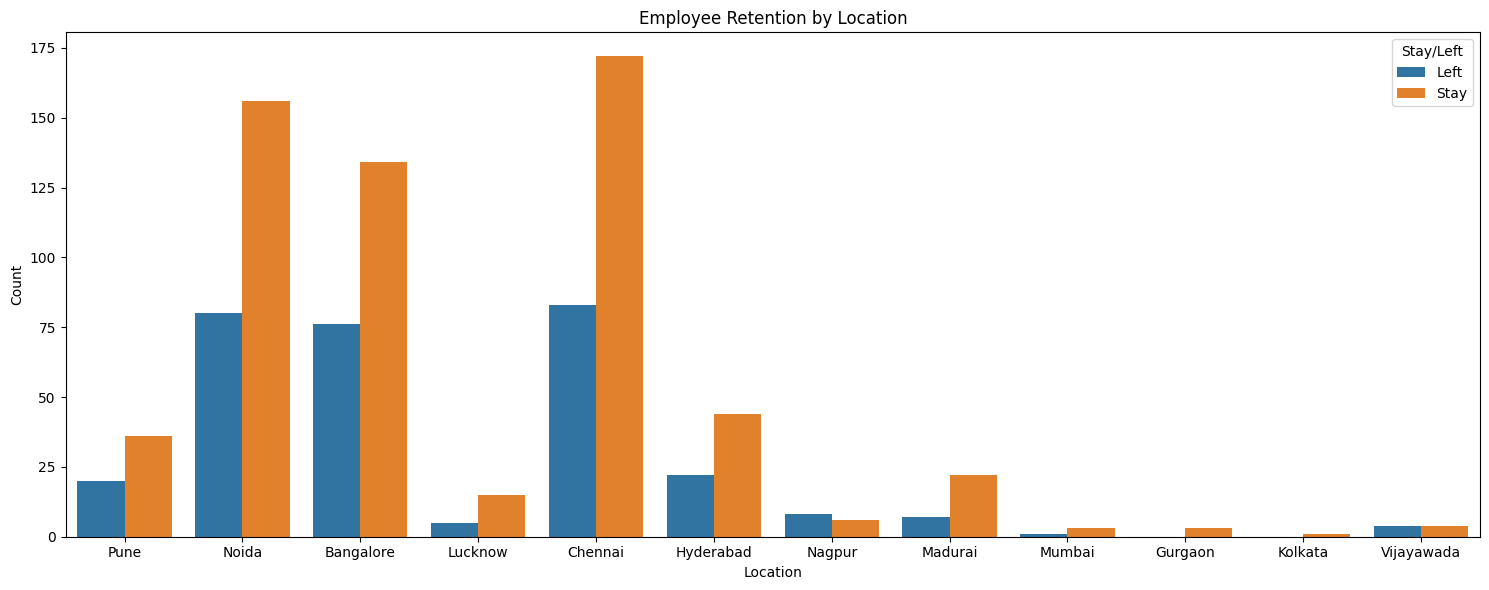

In [11]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Location', hue='Stay/Left')
plt.title('Employee Retention by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Stay/Left')
plt.tight_layout()
plt.show()

# Pie Chart: Stay/Left

In [12]:
fig = px.pie(df, names='Stay/Left', title='Employee Retention',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.update_traces(textinfo='percent+label')
fig.show()

# Box Plot: Experience by Promoted/Non Promoted

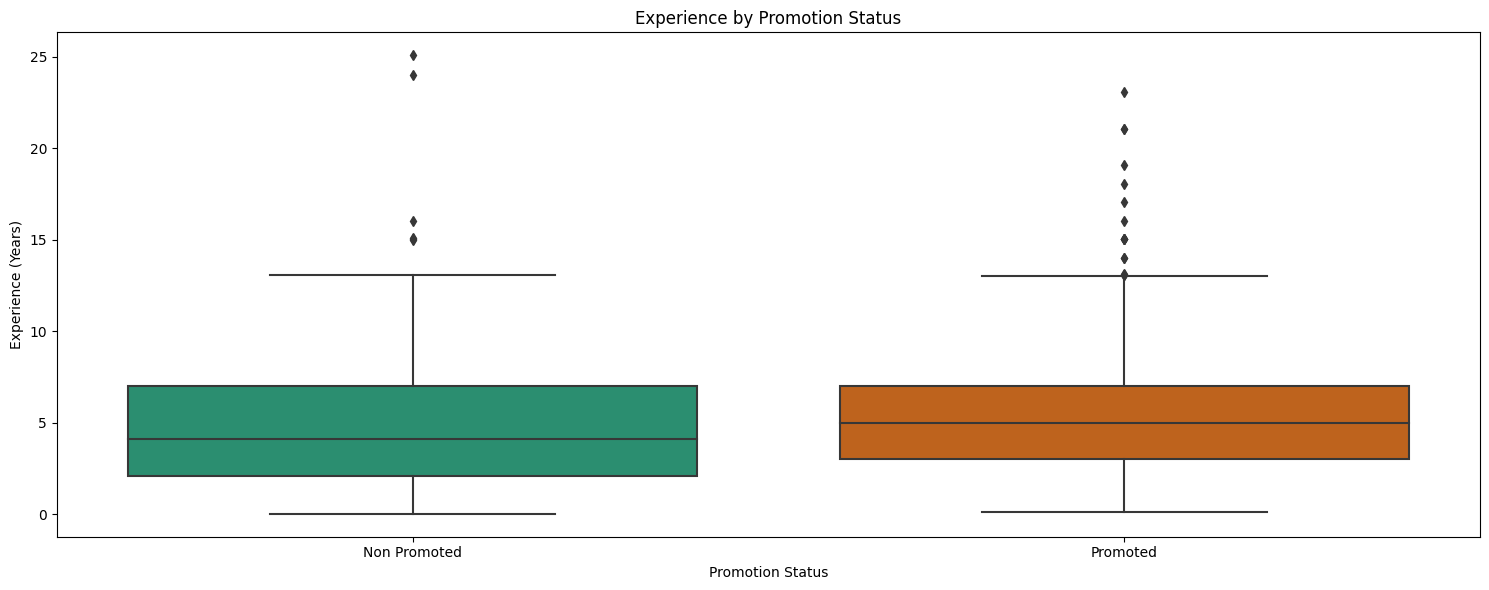

In [13]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Promoted/Non Promoted', y='Experience (YY.MM)',palette="Dark2")
plt.title('Experience by Promotion Status')
plt.xlabel('Promotion Status')
plt.ylabel('Experience (Years)')
plt.tight_layout()
plt.show()

# Scatter Plot: Experience vs. Age, colored by Stay/Left

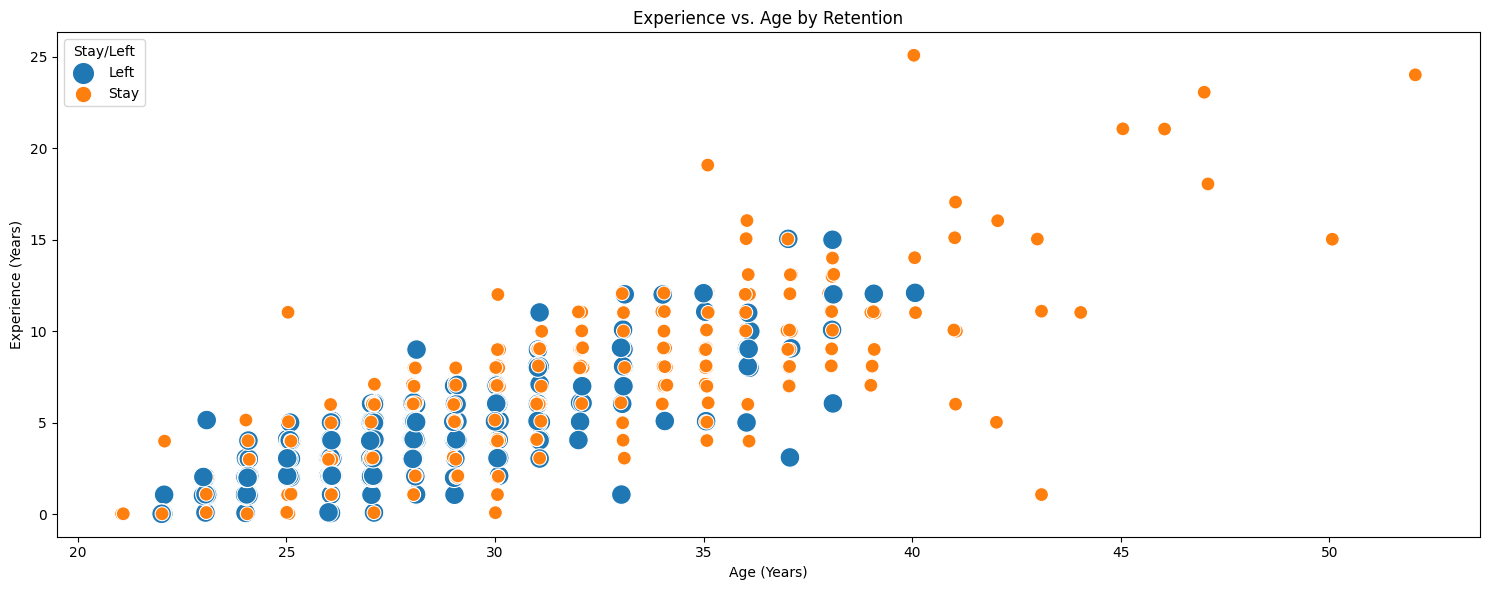

In [14]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=df, x='Age in YY.', y='Experience (YY.MM)', hue='Stay/Left', size='Stay/Left', sizes=(100, 200))
plt.title('Experience vs. Age by Retention')
plt.xlabel('Age (Years)')
plt.ylabel('Experience (Years)')
plt.legend(title='Stay/Left')
plt.tight_layout()
plt.show()

# Heatmap: Stay/Left vs. Job Role Match

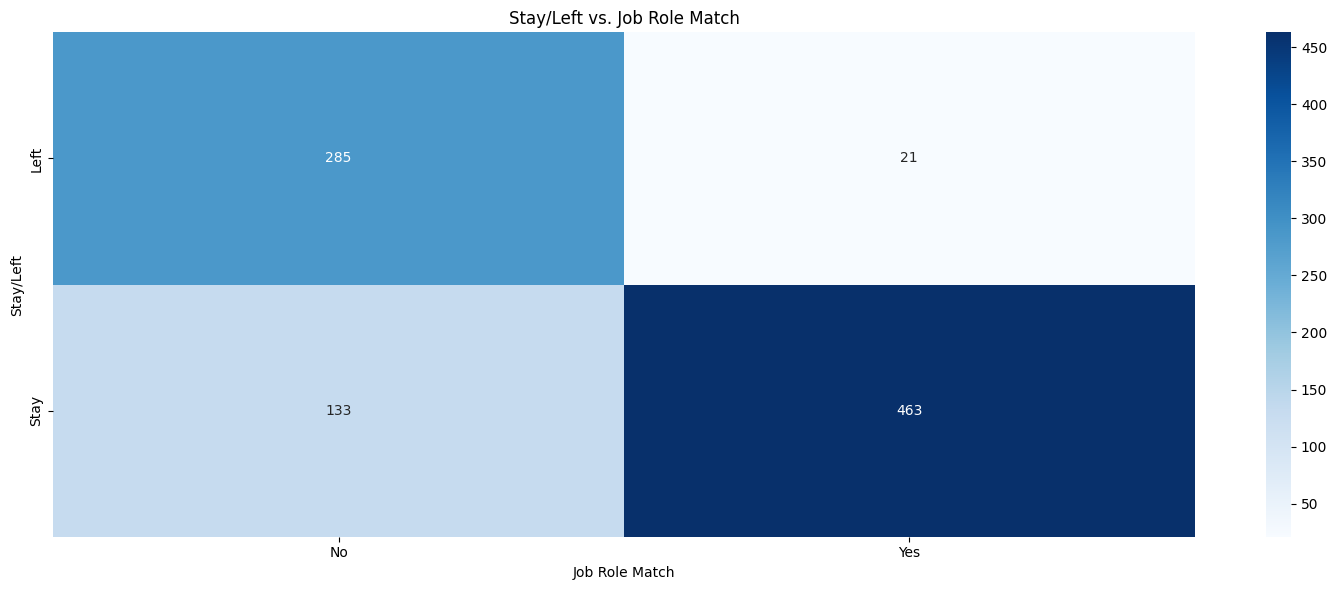

In [15]:
crosstab = pd.crosstab(df['Stay/Left'], df['Job Role Match'])
plt.figure(figsize=(15, 6))
sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
plt.title('Stay/Left vs. Job Role Match')
plt.xlabel('Job Role Match')
plt.ylabel('Stay/Left')
plt.tight_layout()
plt.show()

# Histogram: Experience (YY.MM)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



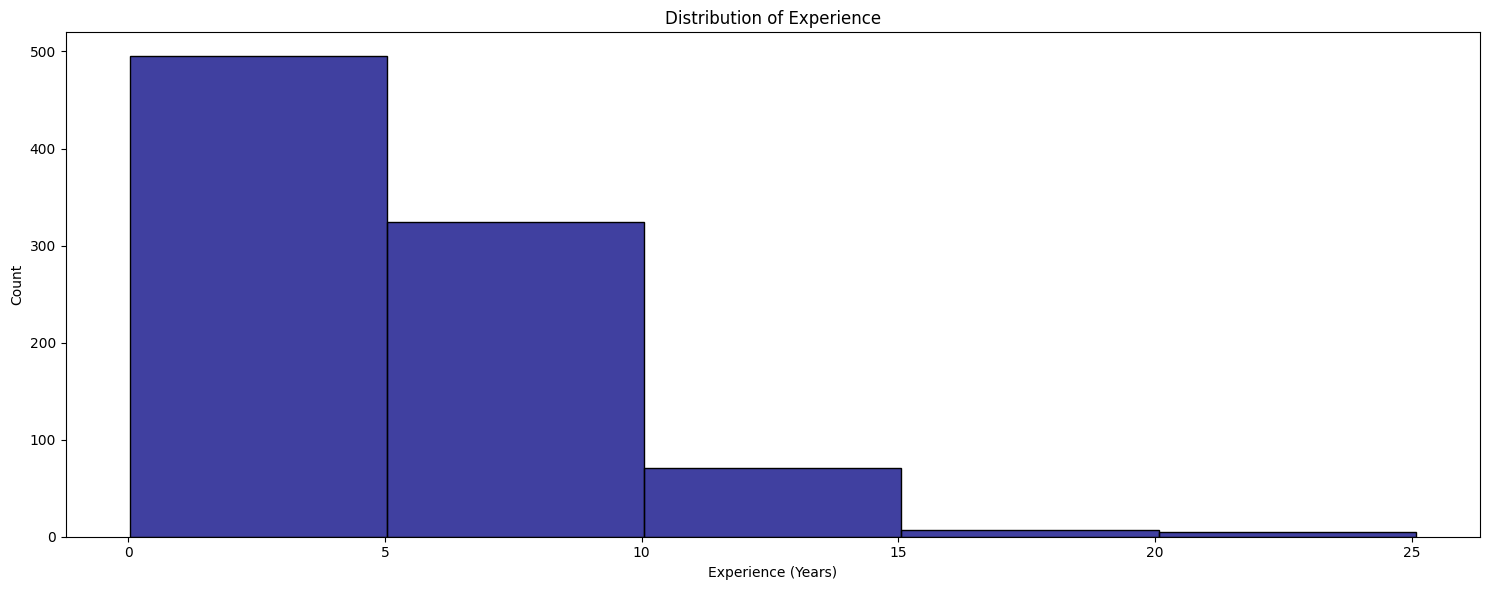

In [16]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='Experience (YY.MM)', bins=5,color="navy")
plt.title('Distribution of Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Stacked Bar Plot: Location vs. Marital Status

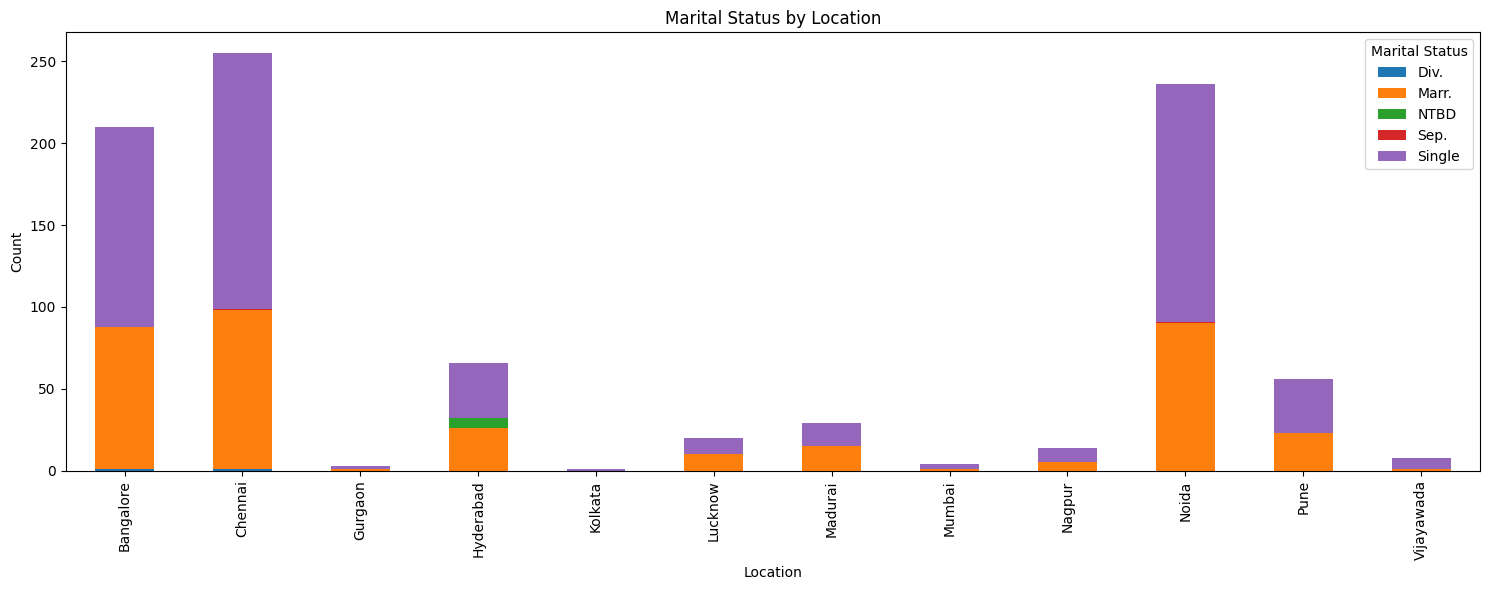

In [17]:
crosstab = pd.crosstab(df['Location'], df['Marital Status'])
crosstab.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Marital Status by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

# Interactive Scatter Plot: Experience vs. Age with hover data

In [18]:
fig = px.scatter(df, x='Age in YY.', y='Experience (YY.MM)', color='Stay/Left',
                 hover_data=['Location', 'Emp. Group', 'Promoted/Non Promoted'],
                 title='Interactive: Experience vs. Age by Retention')
fig.update_layout(xaxis_title='Age (Years)', yaxis_title='Experience (Years)')

fig.show()

In [19]:
df.head()

,table id,name,phone number,Location,Emp. Group,Function,Gender,Tenure,Tenure Grp.,Experience (YY.MM),Marital Status,Age in YY.,Hiring Source,Promoted/Non Promoted,Job Role Match,Stay/Left
0,1,sid,9876544345,Pune,B2,Operation,Male,0.00,< =1,6.08,Single,27.12,Direct,Non Promoted,Yes,Left
1,2,sid,9876544345,Noida,B7,Support,Male,0.00,< =1,13.00,Marr.,38.08,Direct,Promoted,No,Stay
2,3,sid,9876544345,Bangalore,B3,Operation,Male,0.01,< =1,16.05,Marr.,36.04,Direct,Promoted,Yes,Stay
3,4,sid,9876544345,Noida,B2,Operation,Male,0.01,< =1,6.06,Marr.,32.07,Direct,Promoted,Yes,Stay
4,5,sid,9876544345,Lucknow,B2,Operation,Male,0.00,< =1,7.00,Marr.,32.05,Direct,Non Promoted,Yes,Stay


In [20]:
print(df.columns.tolist())


['table id', 'name', 'phone number', 'Location', 'Emp. Group', 'Function', 'Gender ', 'Tenure', 'Tenure Grp.', 'Experience (YY.MM)', 'Marital Status', 'Age in YY.', 'Hiring Source', 'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left']


# Define categorical columns for encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encode_cols = ['Gender ', 'Marital Status', 'Promoted/Non Promoted', 'Job Role Match', 'Stay/Left']
one_hot_encode_cols = ['Location', 'Emp. Group', 'Function', 'Hiring Source']
le = LabelEncoder()
for col in label_encode_cols:
    df[col] = le.fit_transform(df[col])

    print(f"\nLabel Encoding for column '{col.strip()}':")
    for i, label in enumerate(le.classes_):
        
        print(f"  {label} --> {i}")

# Apply One-Hot Encoding to nominal columns
df = pd.get_dummies(df, columns=one_hot_encode_cols, prefix=one_hot_encode_cols)

for col in one_hot_encode_cols:
    print(f"\nOne-hot encoded columns for '{col}':")
    print([c for c in df.columns if c.startswith(f"{col}_")])
    
# Convert any boolean columns to numeric (0/1) explicitly
for col in df.columns:
    if df[col].dtype == bool:
        df[col] = df[col].astype(int)


Label Encoding for column 'Gender':
  Female --> 0
  Male --> 1
  other --> 2

Label Encoding for column 'Marital Status':
  Div. --> 0
  Marr. --> 1
  NTBD --> 2
  Sep. --> 3
  Single --> 4

Label Encoding for column 'Promoted/Non Promoted':
  Non Promoted --> 0
  Promoted --> 1

Label Encoding for column 'Job Role Match':
  No --> 0
  Yes --> 1

Label Encoding for column 'Stay/Left':
  Left --> 0
  Stay --> 1

One-hot encoded columns for 'Location':
['Location_Bangalore', 'Location_Chennai', 'Location_Gurgaon', 'Location_Hyderabad', 'Location_Kolkata', 'Location_Lucknow', 'Location_Madurai', 'Location_Mumbai', 'Location_Nagpur', 'Location_Noida', 'Location_Pune', 'Location_Vijayawada']

One-hot encoded columns for 'Emp. Group':
['Emp. Group_B0', 'Emp. Group_B1', 'Emp. Group_B2', 'Emp. Group_B3', 'Emp. Group_B4', 'Emp. Group_B5', 'Emp. Group_B6', 'Emp. Group_B7', 'Emp. Group_C3', 'Emp. Group_D2']

One-hot encoded columns for 'Function':
['Function_Operation', 'Function_Sales', 'Funct

In [22]:
df.drop(columns=['Tenure Grp.',"table id","name","phone number"], inplace=True)

In [23]:
df.head()

,Gender,Tenure,Experience (YY.MM),Marital Status,Age in YY.,Promoted/Non Promoted,Job Role Match,Stay/Left,Location_Bangalore,Location_Chennai,...,Emp. Group_B6,Emp. Group_B7,Emp. Group_C3,Emp. Group_D2,Function_Operation,Function_Sales,Function_Support,Hiring Source_Agency,Hiring Source_Direct,Hiring Source_Employee Referral
0,1,0.00,6.08,4,27.12,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1,0.00,13.00,1,38.08,1,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,1,0.01,16.05,1,36.04,1,1,1,1,0,...,0,0,0,0,1,0,0,0,1,0
3,1,0.01,6.06,1,32.07,1,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0.00,7.00,1,32.05,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0


# Define features and target

In [24]:
X = df.drop(columns=['Stay/Left'], axis=1)
y = df['Stay/Left']

# Compute Mutual Information scores

In [25]:
from sklearn.feature_selection import mutual_info_classif
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Select top 7 features
top_7_features = mi_scores.head(7)
print("\nTop 7 Features (Mutual Information):")
print(top_7_features)
selected_columns = top_7_features.index.tolist() + ['Stay/Left']
df = df[selected_columns]
df.head()


Top 7 Features (Mutual Information):
Job Role Match        0.264055
Experience (YY.MM)    0.042555
Marital Status        0.038239
Emp. Group_B1         0.029983
Location_Gurgaon      0.022676
Function_Operation    0.022443
Age in YY.            0.021291
dtype: float64


,Job Role Match,Experience (YY.MM),Marital Status,Emp. Group_B1,Location_Gurgaon,Function_Operation,Age in YY.,Stay/Left
0,1,6.08,4,0,0,1,27.12,0
1,0,13.00,1,0,0,0,38.08,1
2,1,16.05,1,0,0,1,36.04,1
3,1,6.06,1,0,0,1,32.07,1
4,1,7.00,1,0,0,1,32.05,1


In [26]:
X = df.drop(columns=['Stay/Left'])
y = df['Stay/Left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


In [27]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(verbose=100, random_seed=42,iterations=1000,learning_rate=0.1,depth=6)
model.fit(X_train, y_train)


0:	learn: 0.5804021	total: 53.3ms	remaining: 53.2s
100:	learn: 0.1382046	total: 164ms	remaining: 1.46s
200:	learn: 0.0789203	total: 278ms	remaining: 1.1s
300:	learn: 0.0513051	total: 391ms	remaining: 909ms
400:	learn: 0.0366512	total: 505ms	remaining: 755ms
500:	learn: 0.0274142	total: 619ms	remaining: 616ms
600:	learn: 0.0214980	total: 732ms	remaining: 486ms
700:	learn: 0.0177105	total: 846ms	remaining: 361ms
800:	learn: 0.0149579	total: 959ms	remaining: 238ms
900:	learn: 0.0130562	total: 1.07s	remaining: 118ms
999:	learn: 0.0116108	total: 1.18s	remaining: 0us


In [28]:
y_pred = model.predict(X_test)
label_name=["Left","Stay"]
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred,target_names=label_name))

Accuracy: 0.8066298342541437
Classification Report:
               precision    recall  f1-score   support

        Left       0.71      0.72      0.72        61
        Stay       0.86      0.85      0.85       120

    accuracy                           0.81       181
   macro avg       0.78      0.79      0.78       181
weighted avg       0.81      0.81      0.81       181



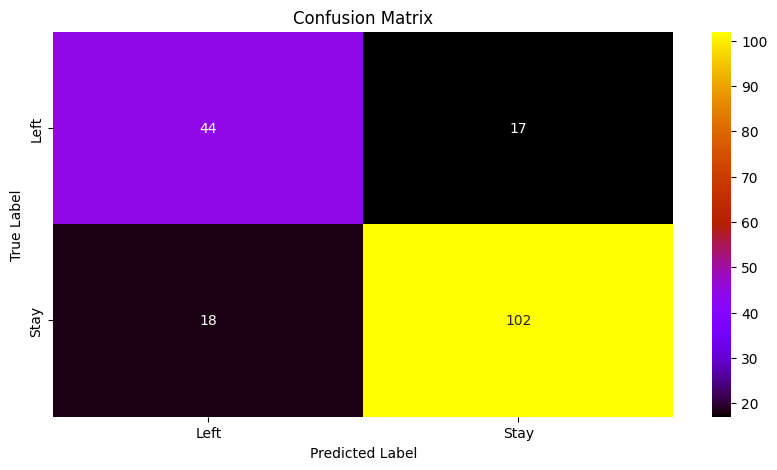

In [29]:
cm = confusion_matrix(y_test, y_pred)
# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='gnuplot', xticklabels=label_name, yticklabels=label_name)

# Add titles and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

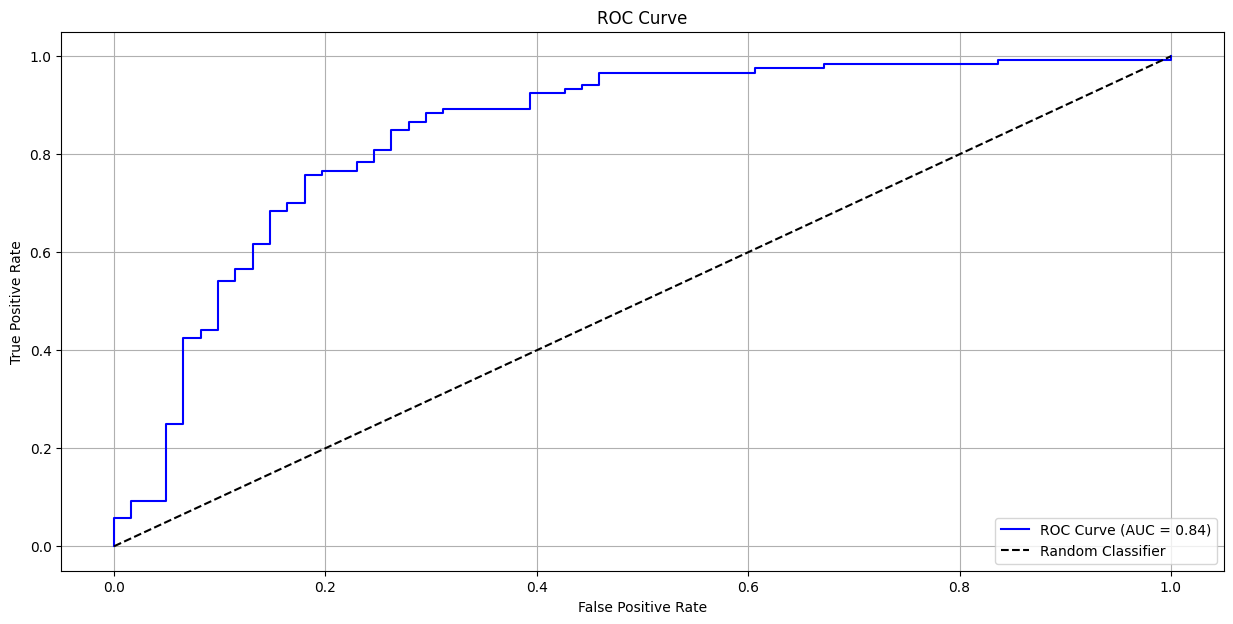

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score


# Get predicted probabilities for the positive class (Stay = 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute FPR (False Positive Rate), TPR (True Positive Rate), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(15, 7))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [33]:
import pickle
f=open("catboost_model.pkl","wb")
pickle.dump(model,f)
f.close()

In [31]:
! pip freeze

absl-py==1.4.0
accelerate==1.8.1
aiofiles==22.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.13
aiosignal==1.3.2
aiosqlite==0.21.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.1
alembic==1.16.2
altair==5.5.0
annotated-types==0.7.0
annoy==1.17.3
ansicolors==1.1.8
antlr4-python3-runtime==4.9.3
anyio==4.9.0
argon2-cffi==25.1.0
argon2-cffi-bindings==21.2.0
args==0.1.0
array_record==0.7.2
arrow==1.3.0
arviz==0.21.0
astropy==7.1.0
astropy-iers-data==0.2025.6.23.0.39.50
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
bayesian-optimization==3.0.0
beartype==0.21.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.8.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.0.0
blosc2==3.5.0
bokeh==3.7.3
Boruta==0.4.3
boto3==1.39.1
botocore==1.39.1
Bottleneck==1.4.2
-e git+https://github.com/SohierDane/BigQuery_Helper@8615a7f6c1663e7f2d48aa2b32c2dbcb